### Business Objective

Spark Funds wants to make investments in a few companies where most investors are spending. It wants to understands global trends in investments so that effective investment decisions can be taken.

Spark Funds has two minor constraints:
1. It wants to invest between 5-15 million USD per round of investment.
2. It wants to invest only in English speaking countries for ease of communication with the companies it would invest in.


Find:
1. Investment type analysis - Comparing typical investment amounts in the venture, seed, angel, private equity so that Spark Funds can choose suitable investment type for their strategy.
2. Sectors - Understading the investment across 8 main sectors.
3. Countries - Identify the countries which have been most heavily invested in the past.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
companies = pd.read_csv('companies.txt', sep = '\t', encoding = 'ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding = 'ISO-8859-1')

In [28]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [29]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


There are null values in the companies data set. We will start by treating them.

In [30]:
round(companies.isnull().sum(axis = 0) / len(companies.index),2)

permalink        0.00
name             0.00
homepage_url     0.08
category_list    0.05
status           0.00
country_code     0.10
state_code       0.13
region           0.12
city             0.12
founded_at       0.23
dtype: float64

Few columns like: homepage_url, state_code, region, city, founded_at can be deleted as they will not contribute to the current 
objective.

In [24]:
companies['founded_at'].describe()

count          51147
unique          3978
top       01-01-2012
freq            2730
Name: founded_at, dtype: object

In [31]:
companies[companies['name'].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/Organization/Tell-It-In,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [18]:
companies.loc[companies['name'].isnull(),'name'] = 'Tell It In'

In [23]:
companies[companies['homepage_url'].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
10,/Organization/1-4-All,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
16,/Organization/1-Of-99,1 of 99,NaN,Entertainment|Games,operating,USA,CA,SF Bay Area,Mountain View,01-12-2014
43,/Organization/10Â°North,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
51,/Organization/121-Rentals,121 Rentals,NaN,Real Estate,operating,USA,TX,TX - Other,Amarillo,12-04-2011
75,/Organization/16-Mile-Solutions,16 Mile Solutions,NaN,Software,operating,USA,WA,Seattle,Seattle,01-01-2006
...,...,...,...,...,...,...,...,...,...,...
66247,/Organization/Zperfectgift,zPerfectGift,NaN,Social Media,operating,USA,UT,Salt Lake City,Midvale,01-01-2010
66267,/Organization/Zuffle,Zuffle,NaN,Application Platforms|Entertainment|Games|Grap...,operating,ITA,17,ITA - Other,Prato,NaN
66292,/Organization/Zumodrive,zumodrive,NaN,Cloud Computing|Digital Media|File Sharing,operating,NaN,NaN,NaN,NaN,NaN
66311,/Organization/Zuse,Zuse,NaN,Software,operating,USA,NY,New York City,New York,NaN


In [32]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [33]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [34]:
## Changing values in common columns in lowercase
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [35]:
## Total Unique companies in rounds table
len(rounds2['company_permalink'].unique())

66370

In [36]:
## Total unique companies in company table
len(companies['permalink'].unique())

66368

In [37]:
companies.shape

(66368, 10)

permalink column in companies dataframe can be used as unique key

In [38]:
#unique_companies = companies['permalink'].unique()
#for comp in rounds2['company_permalink'].unique():
#    if comp not in unique_companies:
#        print (comp)
rounds2.loc[(~rounds2['company_permalink'].isin(companies['permalink'])) , :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


There are 2 companies in <b>rounds</b> file which are not present in **companies** file

In [11]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [12]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
master_frame = pd.merge(companies, rounds2, how = 'inner', left_on = 'permalink', right_on = 'company_permalink')

In [14]:
print (companies.shape, rounds2.shape, master_frame.shape)

(66368, 10) (114949, 6) (114942, 16)


In [15]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
master_frame['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [17]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [18]:
master_frame['funding_round_type'].value_counts()

venture                  55493
seed                     30518
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

Around 55K companies are receiving **venture** type of funding

In [19]:
## Amount invested in each funding type
master_frame.groupby(by = 'funding_round_type')['raised_amount_usd'].sum()

funding_round_type
angel                    4.659255e+09
convertible_note         2.103126e+09
debt_financing           1.138848e+11
equity_crowdfunding      6.611162e+08
grant                    9.134424e+09
non_equity_assistance    3.001782e+07
post_ipo_debt            2.564309e+10
post_ipo_equity          5.161061e+10
private_equity           1.419254e+11
product_crowdfunding     5.261686e+08
secondary_market         2.389489e+09
seed                     1.698824e+10
undisclosed              3.044143e+10
venture                  5.901262e+11
Name: raised_amount_usd, dtype: float64

In [20]:
X = master_frame['funding_round_type'].unique()
h = []
for fund in X:
    h.append(master_frame[master_frame['funding_round_type'] == fund]['raised_amount_usd'].sum())
print (X)
print (h)

['venture' 'seed' 'undisclosed' 'equity_crowdfunding' 'convertible_note'
 'private_equity' 'debt_financing' 'angel' 'grant' 'secondary_market'
 'post_ipo_equity' 'post_ipo_debt' 'product_crowdfunding'
 'non_equity_assistance']
[590126216876.0, 16988238596.0, 30441429697.0, 661116163.0, 2103125572.0, 141925436105.0, 113884840886.0, 4659255123.0, 9134424145.0, 2389488903.0, 51610606151.0, 25643094917.0, 526168593.0, 30017823.0]


In [21]:
X = ['angel','venture','seed','private_equity']
f = []   ## count of investments in each of the above funding type
t = []   ## total investments in each of the above funding type
for i in X:
    f.append(master_frame[master_frame['funding_round_type'] == i]['funding_round_type'].count())
    t.append(master_frame[master_frame['funding_round_type'] == i]['raised_amount_usd'].sum())
print (X)
print (f)
print (t)

['angel', 'venture', 'seed', 'private_equity']
[6094, 55493, 30518, 2285]
[4659255123.0, 590126216876.0, 16988238596.0, 141925436105.0]


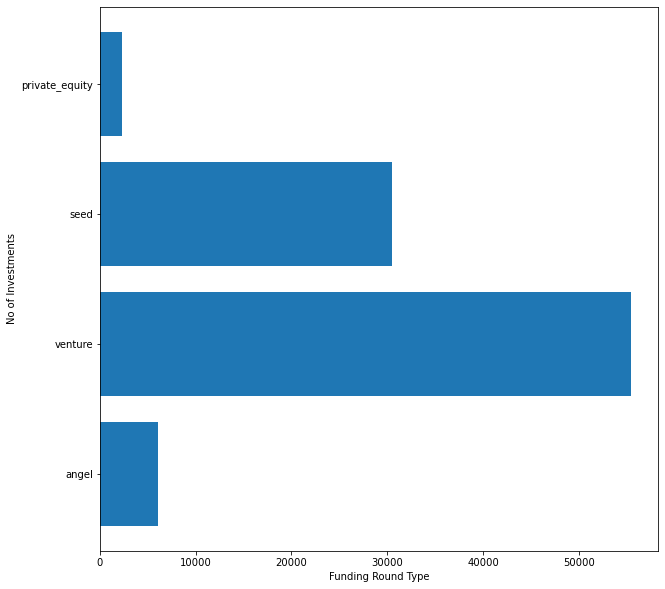

In [22]:
plt.figure(figsize =  (10,10))
plt.barh(X,f)
plt.xlabel('Funding Round Type')
plt.ylabel('No of Investments')
plt.show()

Since, Venture is the type most funded. Hence, **Venture** fund type is most suitable for Spark Funds.

Now, we filter only **Venture** type of funds


In [23]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [24]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


In [25]:
master_frame.shape

(55493, 16)

In [26]:
## Identifying top countries where highest amount of funding has been done for Venture investment type
countries = master_frame.groupby(by = 'country_code')['raised_amount_usd'].sum().sort_values(ascending = False)[:9].index.tolist()

In [27]:
countries

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

In [28]:
top9 = master_frame[master_frame['country_code'].isin(countries)]

In [29]:
top9.shape

(48099, 16)

In [30]:
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0


In [31]:
invest_country = []
for i in countries:
    invest_country.append(top9[top9['country_code'] == i]['raised_amount_usd'].sum())
print (invest_country)

[422510842796.0, 39835418773.0, 20245627416.0, 14391858718.0, 9583332317.0, 7259536732.0, 6907514579.0, 6346959822.0, 3363676611.0]


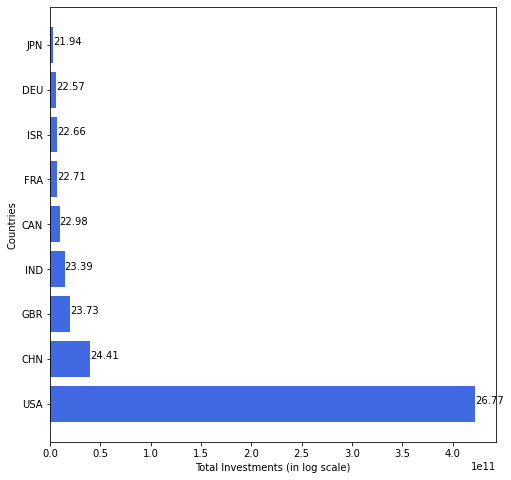

In [32]:
plt.figure(figsize = (8,8))
plt.barh(countries, invest_country, color = 'royalblue')
for i, v in enumerate(invest_country):
    plt.text(v+3, i, str(round(np.log(v),2)), color = 'black')
plt.xlabel('Total Investments (in log scale)')
plt.ylabel('Countries')
plt.show()

Using the link: https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language
Top 3 countries where English is the official or one of the official languages are: **USA, GBR, IND**

In [33]:
top3 = top9[top9['country_code'].isin(['USA','GBR','IND'])]

In [34]:
top3

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114913,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0
114915,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114916,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
114927,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0


Sectors in which most of the investments have been made. As per business rule, first sector is considered as the primary sector. 

Hence, considering only the first sector as the primary sector from category_list column.

In [35]:
top3['primary_sector'] = top3['category_list'].str.split('|').str[0]
top3.drop('category_list', axis = 1, inplace = True)

<ipython-input-35-70f0c2f87c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['primary_sector'] = top3['category_list'].str.split('|').str[0]
C:\Users\aniruddha\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
top3.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
10,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics


In [37]:
## Reading the file mapping.csv
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [38]:
value_columns = ['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']
mapping2 = pd.melt(mapping, id_vars = ['category_list'], value_vars = value_columns, var_name = 'main_sector', value_name = 'value1')

In [39]:
mapping2.head()

,category_list,main_sector,value1
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [40]:
mapping2 = mapping2.loc[mapping2['value1'] == 1]
mapping2.drop('value1', axis = 1, inplace = True)

In [41]:
mapping2

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [42]:
master = pd.merge(top3, mapping2, how = 'inner', left_on = 'primary_sector', right_on = 'category_list')
master

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38810,/organization/yapta,Yapta,http://www.yapta.com,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.0,Tracking,Tracking,Others
38811,/organization/yapta,Yapta,http://www.yapta.com,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Tracking,Tracking,Others
38812,/organization/yapta,Yapta,http://www.yapta.com,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Tracking,Tracking,Others
38813,/organization/yapta,Yapta,http://www.yapta.com,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Tracking,Tracking,Others


In [43]:
## Creating three Dataframes for countries: 'USA', 'GBR', 'IND'
D_USA = master.loc[(master['country_code'] == 'USA') & (master['raised_amount_usd'] >= 5000000) & 
                   (master['raised_amount_usd'] <=15000000),:]
D_GBR = master.loc[(master['country_code'] == 'GBR') & (master['raised_amount_usd'] >= 5000000) & 
                   (master['raised_amount_usd'] <=15000000),:]
D_IND = master.loc[(master['country_code'] == 'IND') & (master['raised_amount_usd'] >= 5000000) & 
                   (master['raised_amount_usd'] <=15000000),:]



### Analyzing Data Frame of USA

In [44]:
D_USA.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list,main_sector
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment
14,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Media,Entertainment
20,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Media,Entertainment
21,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Media,Entertainment
25,/organization/matchmine,MatchMine,http://matchmine.com,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Media,Entertainment


#### Count of investments in each main_sector

In [45]:
X = D_USA.main_sector.unique().tolist()
no_investments = []
for i in X:
    no_investments.append(D_USA[D_USA['main_sector'] == i]['main_sector'].count())
print (X)
print (no_investments)
print (sum(no_investments))

['Entertainment', 'News, Search and Messaging', 'Others', 'Health', 'Cleantech / Semiconductors', 'Manufacturing', 'Social, Finance, Analytics, Advertising', 'Automotive & Sports', 'Blanks']
[580, 1563, 2923, 908, 2297, 799, 1912, 167, 86]
11235


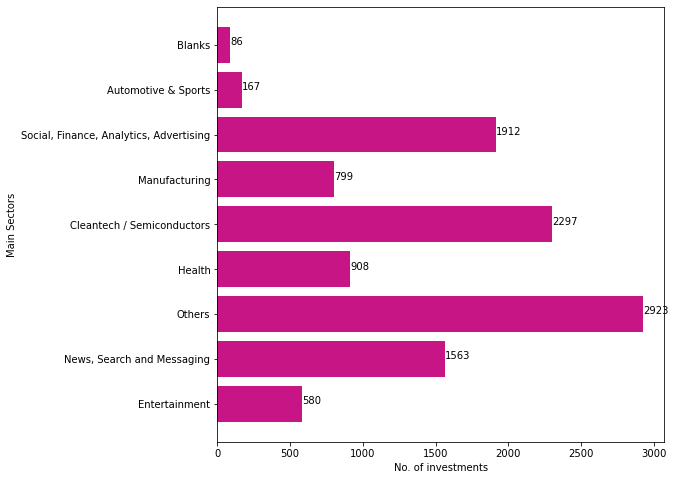

In [46]:
plt.figure(figsize = (8,8))
plt.barh(X, no_investments, color = 'mediumvioletred')
for i,v in enumerate(no_investments):
    plt.text(v+3,i,str(v), color = 'black')
plt.xlabel('No. of investments')
plt.ylabel('Main Sectors')
plt.show()

Top 3 main sectors in which maximum number of investments were made:
- Others
- Cleantech / Semiconductors
- Social, Finance, Analytics, Advertising

#### Total investments made in each main sector

In [47]:
total_investment = []
for i in X:
    total_investment.append(D_USA[D_USA['main_sector'] == i]['raised_amount_usd'].sum())
print (total_investment)
print (sum(total_investment))

[5000212982.0, 13796816094.0, 26089280296.0, 8200859357.0, 21181003033.0, 7258553378.0, 16680695048.0, 1454104361.0, 764763292.0]
100426287841.0


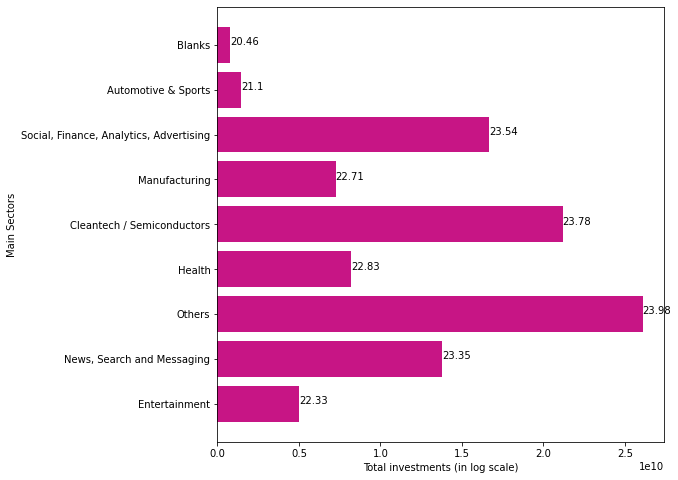

In [48]:
plt.figure(figsize = (8,8))
plt.barh(X,total_investment, color = 'mediumvioletred')
for i,v in enumerate(total_investment):
    plt.text(v+3,i,str(round(np.log(v),2)))
plt.xlabel('Total investments (in log scale)')
plt.ylabel('Main Sectors')
plt.show()

Top 3 main sectors in which highest investments were made:
- Others
- Cleantech / Semiconductors
- Social, Finance, Analytics, Advertising

#### Top 5 companies which received highest investment in 'Others' sector and 'Cleantech / Semiconductors' Sector

In [49]:
D_USA.loc[D_USA['main_sector']== 'Others' , ['name','raised_amount_usd']].sort_values(
    by = 'raised_amount_usd', ascending = False)[:5]

,name,raised_amount_usd
13928,Kaminario,15000000.0
13715,ForgeRock,15000000.0
3060,SRC Computers,15000000.0
36575,Jobvite,15000000.0
3089,StreamBase Systems,15000000.0


In [50]:
D_USA.loc[D_USA['main_sector']== 'Cleantech / Semiconductors' , ['name','raised_amount_usd']].sort_values(
    by = 'raised_amount_usd', ascending = False)[:5]

,name,raised_amount_usd
38710,"Sunverge Energy, Inc",15000000.0
18020,Eos Energy Storage,15000000.0
7643,Altor BioScience,15000000.0
9274,DNAnexus,15000000.0
9273,DNAnexus,15000000.0


### Analyzing Data Frame of UK

In [51]:
D_GBR.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list,main_sector
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
63,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,operating,GBR,H9,London,London,NaN,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Application Platforms,Application Platforms,"News, Search and Messaging"
69,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,Application Platforms,Application Platforms,"News, Search and Messaging"
70,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,Application Platforms,Application Platforms,"News, Search and Messaging"


#### Count of investments in each main_sector

In [52]:
X = D_GBR.main_sector.unique()
no_investments = []
for i in X:
    no_investments.append(D_GBR[D_GBR['main_sector'] == i]['main_sector'].count())
print (X)
print (no_investments)
print (sum(no_investments))

['Entertainment' 'News, Search and Messaging' 'Others' 'Health'
 'Cleantech / Semiconductors' 'Manufacturing'
 'Social, Finance, Analytics, Advertising' 'Automotive & Sports' 'Blanks']
[54, 73, 143, 24, 127, 42, 98, 16, 7]
584


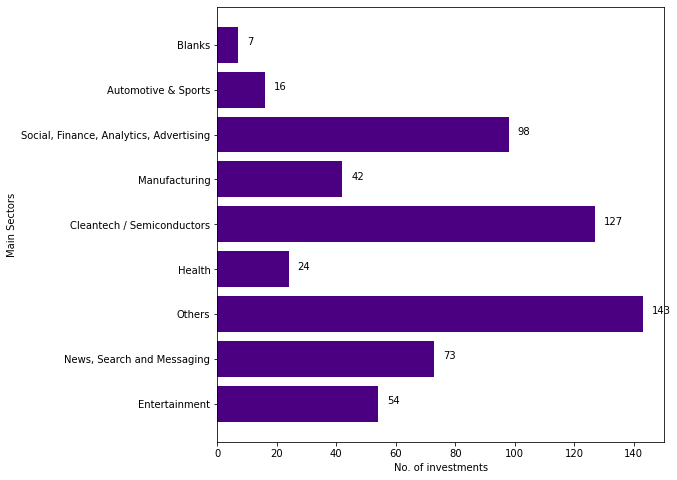

In [53]:
plt.figure(figsize = (8,8))
plt.barh(X,no_investments, color = 'indigo')
for i,v in enumerate(no_investments):
    plt.text(v+3,i,str(v), color = 'black')
plt.xlabel('No. of investments')
plt.ylabel('Main Sectors')
plt.show()

Top 3 main sectors in which maximum number of investments were made
- Others
- Cleantech / Semiconductors
- Social, Finance, Analytics, Advertising

#### Total investments made in each main_sector

In [54]:
total_investment = []
for i in X:
    total_investment.append(D_GBR[D_GBR['main_sector'] == i]['raised_amount_usd'].sum())
print (X)
print (total_investment)
print (sum(total_investment))

['Entertainment' 'News, Search and Messaging' 'Others' 'Health'
 'Cleantech / Semiconductors' 'Manufacturing'
 'Social, Finance, Analytics, Advertising' 'Automotive & Sports' 'Blanks']
[461511059.0, 615746235.0, 1249124289.0, 214537510.0, 1136905008.0, 361940335.0, 821888357.0, 167051565.0, 57764848.0]
5086469206.0


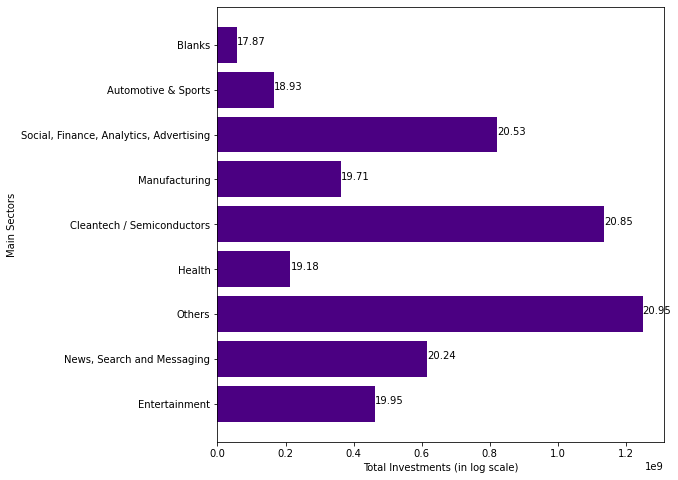

In [55]:
plt.figure(figsize = (8,8))
plt.barh(X,total_investment, color = 'indigo')
for i,v in enumerate(total_investment):
    plt.text(v+3,i,str(round(np.log(v),2)))
plt.xlabel('Total Investments (in log scale)')
plt.ylabel('Main Sectors')
plt.show()

Top 3 main_sectors in which highest investments were made
- Others
- Cleantech / Semiconductors
- Social, Finance, Analytics, Advertising

#### Top 5 companies which received highest invesment in 'Others' sector and 'Cleantech / Semiconductors' sector

In [56]:
D_GBR.loc[D_GBR['main_sector'] == 'Others' , ['name','raised_amount_usd']].sort_values(
    by = 'raised_amount_usd', ascending = False)[:5]

,name,raised_amount_usd
35043,SilverRail Technologies,15000000.0
20617,Notonthehighstreet,15000000.0
422,Azure Solutions,15000000.0
1682,ip.access,15000000.0
1177,EnvironmentIQ,15000000.0


In [57]:
D_GBR.loc[D_GBR['main_sector'] == 'Cleantech / Semiconductors' , ['name','raised_amount_usd']].sort_values( 
    by = 'raised_amount_usd', ascending = False)[:5]

,name,raised_amount_usd
30894,Elixent,15000000.0
30755,Anadigm,15000000.0
11349,Onyvax,14906222.0
10528,Lectus Therapeutics,14257949.0
31436,XMOS,14000000.0


### Analyzing Data Frame of India

In [58]:
D_IND.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
244,/organization/ameyo,Ameyo,http://www.ameyo.com/,operating,IND,10,New Delhi,Gurgaon,01-01-2003,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.0,Software,Software,Others
274,/organization/applabs,AppLabs,http://www.applabs.com,acquired,IND,2,Hyderabad,Hyderabad,01-01-2001,/organization/applabs,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,NaN,29-06-2006,10000000.0,Software,Software,Others
286,/organization/appsdaily-solutions,Appsdaily Solutions,http://appsdailyworld.com/daily/index.jsp,operating,IND,16,Mumbai,Mumbai,01-01-2008,/organization/appsdaily-solutions,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,B,10-04-2014,5000000.0,Software,Software,Others
606,/organization/canvera-digital-technologies,Canvera Digital Technologies,http://canvera.com,operating,IND,19,Bangalore,Bangalore,01-01-2007,/organization/canvera-digital-technologies,/funding-round/26650720abe4be67bb6550fd4ee6d063,venture,NaN,29-08-2012,6500000.0,Software,Software,Others


#### Count of investments made  in each main_sector

In [59]:
X = D_IND.main_sector.unique()
no_investment = []
for i in X:
    no_investment.append(D_IND[D_IND['main_sector'] == i]['main_sector'].count())
print (X)
print (no_investment)
print (sum(no_investment))

['Entertainment' 'Others' 'News, Search and Messaging' 'Health'
 'Cleantech / Semiconductors' 'Manufacturing'
 'Social, Finance, Analytics, Advertising' 'Automotive & Sports' 'Blanks']
[33, 109, 52, 19, 20, 21, 32, 13, 2]
301


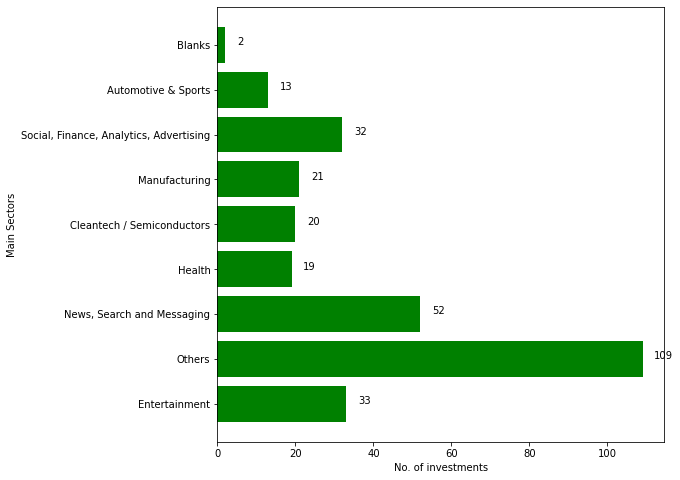

In [60]:
plt.figure(figsize = (8,8))
plt.barh(X,no_investment, color = 'green')
for i, v in enumerate(no_investment):
    plt.text(v+3, i, str(v), color = 'black')
plt.xlabel('No. of investments')
plt.ylabel('Main Sectors')
plt.show()

Top 3 sectors in which maximum investments were made
- Others
- News, Search and Messaging
- Entertainment

#### Total investments made in each main_sector

In [61]:
total_investment = []
for i in X:
    total_investment.append(D_IND[D_IND['main_sector'] == i]['raised_amount_usd'].sum())
print (X)
print (total_investment)
print (sum(total_investment))

['Entertainment' 'Others' 'News, Search and Messaging' 'Health'
 'Cleantech / Semiconductors' 'Manufacturing'
 'Social, Finance, Analytics, Advertising' 'Automotive & Sports' 'Blanks']
[280830000.0, 1007409507.0, 433834545.0, 167740000.0, 165380000.0, 200900000.0, 290543500.0, 136900000.0, 27000000.0]
2710537552.0


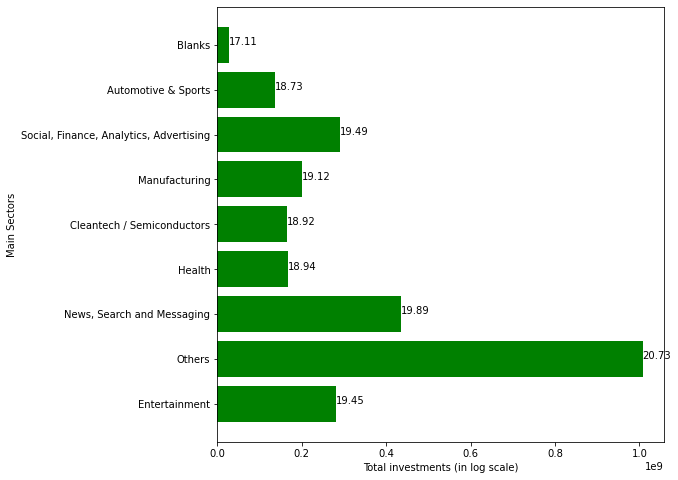

In [62]:
plt.figure(figsize = (8,8))
plt.barh(X, total_investment, color = 'green')
for i,v in enumerate(total_investment):
    plt.text(v+3,i, str(round(np.log(v),2)), color = 'black')
plt.xlabel('Total investments (in log scale)')
plt.ylabel('Main Sectors')
plt.show()

Top 3 sectors in which maximum investments were made
- Others
- News, Search and Messaging
- Social, Finance, Analytics, Advertising

#### Top 5 companies which received highest investment in 'Others' sector and 'News, Search and Messaging' sector

In [63]:
D_IND.loc[D_IND['main_sector'] == 'Others', ['name','raised_amount_usd']].sort_values( 
    by = 'raised_amount_usd', ascending = False)[:5]

,name,raised_amount_usd
38040,Comat Technologies,15000000.0
27213,iPolicy Networks,15000000.0
13740,GirnarSoft,15000000.0
20499,LimeRoad,15000000.0
20713,Pepperfry.com,15000000.0


In [64]:
D_IND.loc[D_IND['main_sector'] == 'News, Search and Messaging', ['name','raised_amount_usd']].sort_values( 
    by = 'raised_amount_usd', ascending = False)[:5]

,name,raised_amount_usd
28295,Mobile2Win India,15000000.0
23825,hike,14000000.0
28081,IMImobile,13000000.0
28623,SMS GupShup,12000000.0
28051,GupShup,12000000.0


### Combined chart for top 3 sectors in top 3 countries 

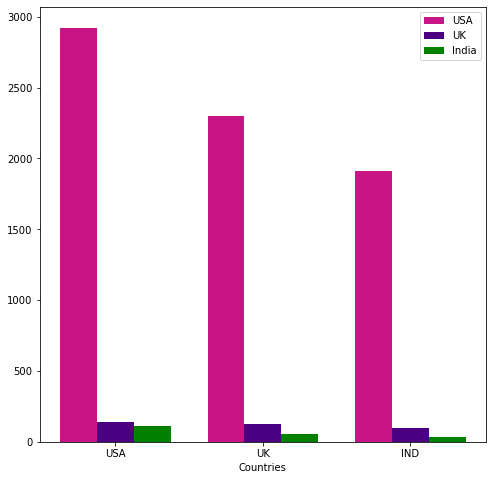

In [180]:
USA_investments = [2923,2297,1912]
GBR_investments = [143,127,98]
IND_investments = [109,52,33]

## Bar positions
USA_bar = np.arange(len(USA_investments))
GBR_bar = [x+0.25 for x in USA_bar]
IND_bar = [x+0.25 for x in GBR_bar]

## Plot the graph
plt.figure(figsize = (8,8))
plt.bar(USA_bar, USA_investments, width = 0.25, color = 'mediumvioletred', label = 'USA')
plt.bar(GBR_bar, GBR_investments, width = 0.25, color = 'indigo', label = 'UK')
plt.bar(IND_bar, IND_investments, width = 0.25, color = 'green', label = 'India')

plt.xlabel('Countries')
plt.legend()
plt.xticks([x+0.25 for x in np.arange(3)], ['USA','UK','IND'])
plt.show()